# Install required libraries if not already installed
!pip install wordcloud
!pip install seaborn
!pip install sklearn
!pip install transformers
!pip install torch
!pip install nltk

In [2]:
# Packages Installation
import pandas as pd
from transformers import Trainer, TrainingArguments, T5ForConditionalGeneration, T5Tokenizer
from datasets import load_metric
from sklearn.model_selection import train_test_split
import re

##### Fetching Metadata from CSV

In [29]:
Metadata = pd.read_csv('C:\\Users\\Steffi Grace\\24592774_LLM_ILabResearch\\Notebooks\\Datasets\\Filtered_MetaData.csv')

##### Preparing the data

In [4]:
def preprocess_metadata(metadata):
    # Clean text data (e.g., remove special characters, lowercase)
    cleaned_metadata = metadata.copy() 
    cleaned_metadata['description'] = cleaned_metadata['description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
    cleaned_metadata['description'] = cleaned_metadata['description'].str.lower()
    cleaned_metadata['title'] = cleaned_metadata['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
    cleaned_metadata['title'] = cleaned_metadata['title'].str.lower()
    cleaned_metadata['summary'] = cleaned_metadata['summary'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
    cleaned_metadata['summary'] = cleaned_metadata['summary'].str.lower()

    
    # Tokenize text data (split into words)
    cleaned_metadata['description'] = cleaned_metadata['description'].str.split()        
    cleaned_metadata['title'] = cleaned_metadata['title'].str.split()        
    cleaned_metadata['summary'] = cleaned_metadata['summary'].str.split()

    # Handle missing values (e.g., fill with a placeholder or remove rows)
    cleaned_metadata.fillna('', inplace=True)
    
    return cleaned_metadata

# Preprocess metadata
Preprocess_Metadata = preprocess_metadata(Metadata)

print("Preprocessed metadata:")
print(Preprocess_Metadata.head())


Preprocessed metadata:
                                               title  \
0  [2023w7, global, electric, vehicle, market, sh...   
1         [connected, electric, autonomous, vehicle]   
2            [electric, vehicle, charging, stations]   
3  [nyserda, electric, vehicle, drive, clean, reb...   
4  [impact, of, uncoordinated, plugin, electric, ...   

                                         description  \
0         [global, electric, vehicle, market, share]   
1         [connected, electric, autonomous, vehicle]   
2            [electric, vehicle, charging, stations]   
3  [new, york, states, charge, ny, initiative, of...   
4  [impact, of, uncoordinated, plugin, electric, ...   

                                             summary  \
0         [global, electric, vehicle, market, share]   
1  [romanian, new, car, registration, in, 2023, v...   
2  [statewise, data, from, 2001, is, classified, ...   
3      [coronoavirus, covid19, data, updated, daily]   
4  [adding, public, dat

In [5]:
Preprocess_Metadata = preprocess_metadata(Metadata)


In [6]:
Preprocess_Metadata

,title,description,summary,tags,dataset_url,available_formats
0,"[2023w7, global, electric, vehicle, market, sh...","[global, electric, vehicle, market, share]","[global, electric, vehicle, market, share]",makeover monday cars vehicles electric ev mark...,https://data.world/makeovermonday/2023w7,['xlsx']
1,"[connected, electric, autonomous, vehicle]","[connected, electric, autonomous, vehicle]","[romanian, new, car, registration, in, 2023, v...",autonomous,https://data.world/smartcolumbusos/650b7e59-af...,['csv']
2,"[electric, vehicle, charging, stations]","[electric, vehicle, charging, stations]","[statewise, data, from, 2001, is, classified, ...",electric vehicle environment energy,https://data.world/townofcary/electric-vehicle...,"['dbf', 'prj', 'json', 'shp', 'csv', 'shx']"
3,"[nyserda, electric, vehicle, drive, clean, reb...","[new, york, states, charge, ny, initiative, of...","[coronoavirus, covid19, data, updated, daily]",ev electric vehicle bev phev ghg drive clean r...,https://data.world/data-ny-gov/thd2-fu8y,['csv']
4,"[impact, of, uncoordinated, plugin, electric, ...","[impact, of, uncoordinated, plugin, electric, ...","[adding, public, datasets, related, to, corona...",battery consumption data energy hybrid midwest...,https://data.world/us-doe-gov/8ae7e117-313b-40...,['xlsx']
...,...,...,...,...,...,...
74,"[recognized, sports]","[recognized, sports]","[here, is, a, list, of, international, sports,...",sports official sports list of sports types of...,https://data.world/sports/recognized-sports,['xlsx']
75,"[sports, illustrated, covers]","[sports, illustrated, covers]","[a, data, set, listing, the, sports, that, hav...",crowdsourced sports magazine cover images phot...,https://data.world/crowdflower/sports-illustra...,['csv']
76,"[winningest, cities, in, sports]","[data, for, every, championship, win, in, six,...","[data, for, every, championship, win, in, six,...",sports championships rankings basketball footb...,https://data.world/the-pudding/winningest-citi...,"['json', 'csv']"
77,"[thurrock, outdoor, sports]","[thurrock, outdoor, sports]","[this, dataset, shows, the, locations, of, out...",,https://data.world/datagov-uk/17c44e3a-804c-48...,['xml']


In [7]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

def preprocess_text(text):
    # Replace 'nan' string with an empty string
    if text == 'nan':
        return ""
    if isinstance(text, list):
        # Convert list of strings to a single string
        text = ' '.join(text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove punctuation and non-alphabetic characters, and single character tokens
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalpha() and len(token) > 1]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


In [8]:
  # Apply preprocessing to text columns
for column in ['title', 'description', 'summary']:
    Preprocess_Metadata[column] = Preprocess_Metadata[column].apply(preprocess_text)

In [9]:
print(Preprocess_Metadata)

                                                title  \
0                global electric vehicle market share   
1               connected electric autonomous vehicle   
2                   electric vehicle charging station   
3    nyserda electric vehicle drive clean rebate data   
4   impact uncoordinated plugin electric vehicle c...   
..                                                ...   
74                                   recognized sport   
75                            sport illustrated cover   
76                              winningest city sport   
77                             thurrock outdoor sport   
78                                  trend youth sport   

                                          description  \
0                global electric vehicle market share   
1               connected electric autonomous vehicle   
2                   electric vehicle charging station   
3   new york state charge ny initiative offer elec...   
4   impact uncoordinated plugi

In [10]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

metadata = Preprocess_Metadata.copy()

def preprocess_text(text):
    if text == 'nan':
        return ""
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalpha() and len(token) > 1]
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ""

for column in ['title', 'description', 'summary']:
    metadata[column] = metadata[column].apply(preprocess_text)

metadata_embeddings = []
for index, row in metadata.iterrows():
    text = row['title'] + ' ' + row['description'] + ' ' + row['summary']
    tokenized_text = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        output = model(**tokenized_text)
    embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()
    metadata_embeddings.append(embeddings)

user_input = input("Enter your query: ")
tokenized_input = tokenizer(user_input, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    output = model(**tokenized_input)
user_embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()

similarities = cosine_similarity([user_embeddings], metadata_embeddings)[0]

def adjust_score(score, title, description, summary):
    completeness_factor = 0
    if title:
        completeness_factor += 0.1
    if description:
        completeness_factor += 0.1
    if summary:
        completeness_factor += 0.1
    return score + completeness_factor

adjusted_similarities = []
for i, score in enumerate(similarities):
    title, description, summary = metadata.iloc[i]['title'], metadata.iloc[i]['description'], metadata.iloc[i]['summary']
    adjusted_score = adjust_score(score, title, description, summary)
    adjusted_similarities.append(adjusted_score)

# Calculate the 95th percentile threshold
percentile_threshold = np.percentile(adjusted_similarities, 98)

dataset_urls_with_scores = zip(metadata['dataset_url'], adjusted_similarities)
sorted_dataset_urls_with_scores = sorted(dataset_urls_with_scores, key=lambda x: x[1], reverse=True)

print("Relevant dataset URLs sorted by similarity score (descending order):")
for counter, (dataset_url, similarity_score) in enumerate(sorted_dataset_urls_with_scores, start=1):
    if similarity_score >= percentile_threshold:
        print(f"Counter: {counter}")
        print(f"Similarity Score: {similarity_score}")
        print(f"Dataset URL: {dataset_url}")
        metadata_index = metadata.index[metadata['dataset_url'] == dataset_url].tolist()[0]
        print(f"Title: {metadata['title'].iloc[metadata_index]}")
        print(f"Description: {metadata['description'].iloc[metadata_index]}")
        print(f"Summary: {metadata['summary'].iloc[metadata_index]}")
        print("\n")
        total_output = counter


Relevant dataset URLs sorted by similarity score (descending order):
Counter: 1
Similarity Score: 0.8761519670486451
Dataset URL: https://data.world/rajanand/crime-in-india
Title: crime india
Description: statewise data classified according csv file
Summary: statewise data classified according csv file


Counter: 2
Similarity Score: 0.8428864359855652
Dataset URL: https://data.world/liz-friedman/general-social-survey-data-on-policing-1972-2018
Title: general social survey data policing
Description: selection survey data includes question relating policing
Summary: selection survey data includes question relating policing




In [11]:
total_output

2

In [12]:

relevance_judgments = {url: 1 if score >= percentile_threshold else 0 for url, score in sorted_dataset_urls_with_scores}

# Compute Precision at k (P@k) for the top N documents
k = total_output  # Number of retrieved documents
relevant_count = 0
precision_at_k = []
for i in range(1, k + 1):
    if relevance_judgments[sorted_dataset_urls_with_scores[i - 1][0]] == 1:
        relevant_count += 1
    precision_at_k.append(relevant_count / i)

# Compute Mean Average Precision (MAP)
map_score = np.mean(precision_at_k)

print("Mean Average Precision (MAP):", map_score)


Mean Average Precision (MAP): 1.0


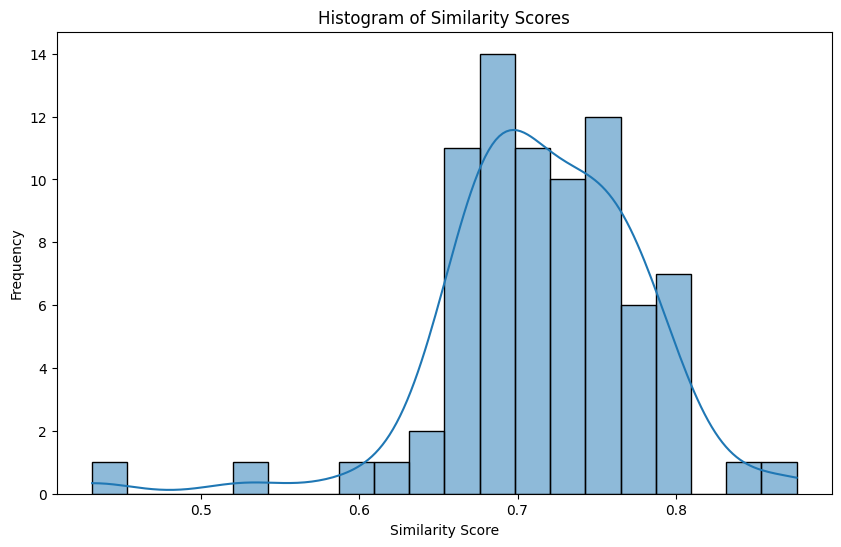

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Similarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(adjusted_similarities, bins=20, kde=True)
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

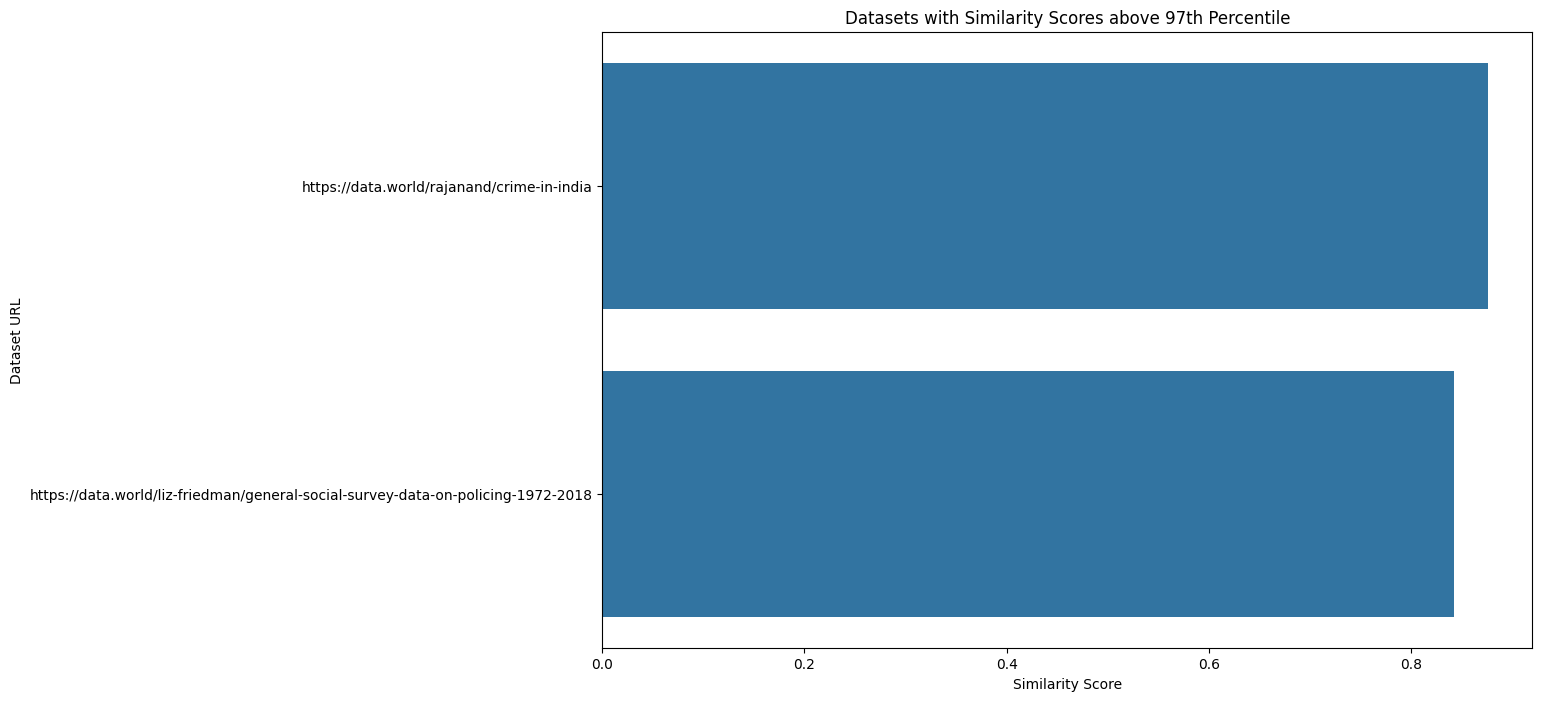

In [14]:
# Filter datasets above the 97th percentile threshold
filtered_dataset_urls_with_scores = [(dataset_url, similarity_score) for dataset_url, similarity_score in sorted_dataset_urls_with_scores if similarity_score >= percentile_threshold]

# Extract dataset URLs and similarity scores
filtered_dataset_urls = [dataset_url for dataset_url, _ in filtered_dataset_urls_with_scores]
filtered_similarity_scores = [similarity_score for _, similarity_score in filtered_dataset_urls_with_scores]

# Bar Chart of Datasets above 97th Percentile
plt.figure(figsize=(12, 8))
sns.barplot(x=filtered_similarity_scores, y=filtered_dataset_urls)
plt.title('Datasets with Similarity Scores above 97th Percentile')
plt.xlabel('Similarity Score')
plt.ylabel('Dataset URL')
plt.show()


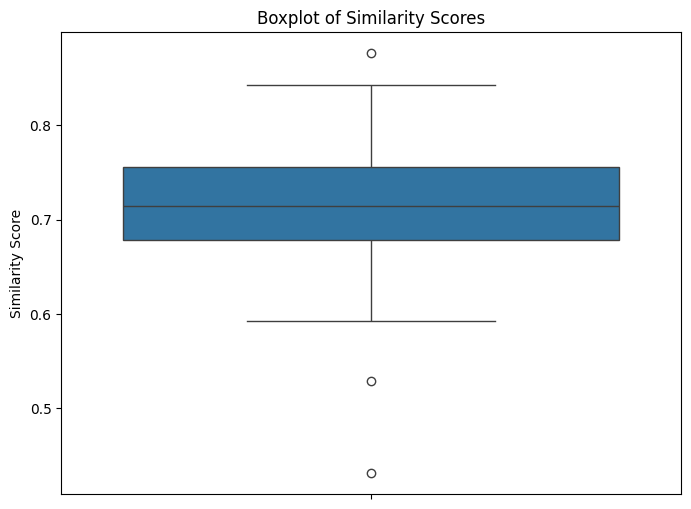

In [15]:
# Boxplot of Similarity Scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=adjusted_similarities)
plt.title('Boxplot of Similarity Scores')
plt.ylabel('Similarity Score')
plt.show()

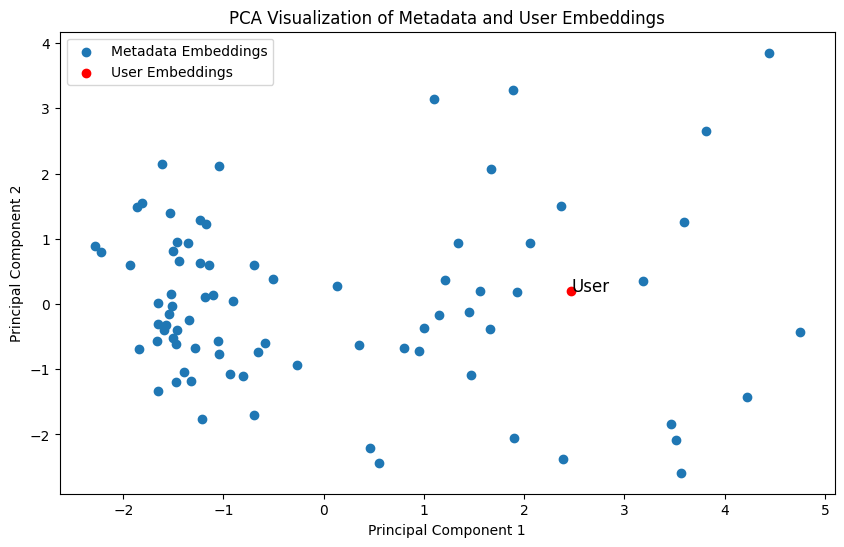

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on metadata embeddings
pca = PCA(n_components=total_output)
metadata_embeddings_pca = pca.fit_transform(metadata_embeddings)

# Perform PCA on user embeddings
user_embeddings_pca = pca.transform(user_embeddings.reshape(1, -1))

# Plot metadata embeddings
plt.figure(figsize=(10, 6))
plt.scatter(metadata_embeddings_pca[:, 0], metadata_embeddings_pca[:, 1], label='Metadata Embeddings')

# Plot user embeddings
plt.scatter(user_embeddings_pca[:, 0], user_embeddings_pca[:, 1], color='red', label='User Embeddings')

# Annotate user embeddings
plt.text(user_embeddings_pca[:, 0], user_embeddings_pca[:, 1], 'User', fontsize=12)

plt.title('PCA Visualization of Metadata and User Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [17]:

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
model = BertModel.from_pretrained('bert-large-uncased')

In [18]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


metadata = Preprocess_Metadata.copy()

def preprocess_text(text):
    if text == 'nan':
        return ""
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalpha() and len(token) > 1]
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ""

for column in ['title', 'description', 'summary']:
    metadata[column] = metadata[column].apply(preprocess_text)

metadata_embeddings = []
for index, row in metadata.iterrows():
    text = row['title'] + ' ' + row['description'] + ' ' + row['summary']
    tokenized_text = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        output = model(**tokenized_text)
    embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()
    metadata_embeddings.append(embeddings)

user_input = input("Enter your query: ")
tokenized_input = tokenizer(user_input, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    output = model(**tokenized_input)
user_embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()

similarities = cosine_similarity([user_embeddings], metadata_embeddings)[0]

def adjust_score(score, title, description, summary):
    completeness_factor = 0
    if title:
        completeness_factor += 0.1
    if description:
        completeness_factor += 0.1
    if summary:
        completeness_factor += 0.1
    return score + completeness_factor

adjusted_similarities = []
for i, score in enumerate(similarities):
    title, description, summary = metadata.iloc[i]['title'], metadata.iloc[i]['description'], metadata.iloc[i]['summary']
    adjusted_score = adjust_score(score, title, description, summary)
    adjusted_similarities.append(adjusted_score)

# Calculate the 95th percentile threshold
percentile_threshold = np.percentile(adjusted_similarities, 95)

dataset_urls_with_scores = zip(metadata['dataset_url'], adjusted_similarities)
sorted_dataset_urls_with_scores = sorted(dataset_urls_with_scores, key=lambda x: x[1], reverse=True)

print("Relevant dataset URLs sorted by similarity score (descending order):")
for counter, (dataset_url, similarity_score) in enumerate(sorted_dataset_urls_with_scores, start=1):
    if similarity_score >= percentile_threshold:
        print(f"Counter: {counter}")
        print(f"Similarity Score: {similarity_score}")
        print(f"Dataset URL: {dataset_url}")
        metadata_index = metadata.index[metadata['dataset_url'] == dataset_url].tolist()[0]
        print(f"Title: {metadata['title'].iloc[metadata_index]}")
        print(f"Description: {metadata['description'].iloc[metadata_index]}")
        print(f"Summary: {metadata['summary'].iloc[metadata_index]}")
        print("\n")
        total_output = counter


Relevant dataset URLs sorted by similarity score (descending order):
Counter: 1
Similarity Score: 1.0579363584518433
Dataset URL: https://data.world/rajanand/crime-in-india
Title: crime india
Description: statewise data classified according csv file
Summary: statewise data classified according csv file


Counter: 2
Similarity Score: 1.0080845832824707
Dataset URL: https://data.world/liz-friedman/general-social-survey-data-on-policing-1972-2018
Title: general social survey data policing
Description: selection survey data includes question relating policing
Summary: selection survey data includes question relating policing


Counter: 3
Similarity Score: 0.992429542541504
Dataset URL: https://data.world/zendoll27/trends-in-youth-sports
Title: trend youth sport
Description: aspen institute trend youth sport report
Summary: aspen institute trend youth sport report


Counter: 4
Similarity Score: 0.9873710155487061
Dataset URL: https://data.world/markmarkoh/coronavirus-data
Title: coronavirus

In [19]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load pre-trained BERT model and tokenizer
#tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
#model = BertModel.from_pretrained('bert-large-uncased')

metadata = Preprocess_Metadata.copy()

def preprocess_text(text):
    if text == 'nan':
        return ""
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalpha() and len(token) > 1]
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ""

for column in ['title', 'description', 'summary']:
    metadata[column] = metadata[column].apply(preprocess_text)

metadata_embeddings = []
for index, row in metadata.iterrows():
    text = row['title'] + ' ' + row['description'] + ' ' + row['summary']
    tokenized_text = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        output = model(**tokenized_text)
    embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()
    metadata_embeddings.append(embeddings)

user_input = input("Enter your query: ")
tokenized_input = tokenizer(user_input, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    output = model(**tokenized_input)
user_embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()

similarities = cosine_similarity([user_embeddings], metadata_embeddings)[0]

def adjust_score(score, title, description, summary):
    completeness_factor = 0
    if title:
        completeness_factor += 0.1
    if description:
        completeness_factor += 0.1
    if summary:
        completeness_factor += 0.1
    return score + completeness_factor

adjusted_similarities = []
for i, score in enumerate(similarities):
    title, description, summary = metadata.iloc[i]['title'], metadata.iloc[i]['description'], metadata.iloc[i]['summary']
    adjusted_score = adjust_score(score, title, description, summary)
    adjusted_similarities.append(adjusted_score)

# Calculate the 95th percentile threshold
percentile_threshold = np.percentile(adjusted_similarities, 95)

dataset_urls_with_scores = zip(metadata['dataset_url'], adjusted_similarities)
sorted_dataset_urls_with_scores = sorted(dataset_urls_with_scores, key=lambda x: x[1], reverse=True)

print("Relevant dataset URLs sorted by similarity score (descending order):")
for counter, (dataset_url, similarity_score) in enumerate(sorted_dataset_urls_with_scores, start=1):
    if similarity_score >= percentile_threshold:
        print(f"Counter: {counter}")
        print(f"Similarity Score: {similarity_score}")
        print(f"Dataset URL: {dataset_url}")
        metadata_index = metadata.index[metadata['dataset_url'] == dataset_url].tolist()[0]
        print(f"Title: {metadata['title'].iloc[metadata_index]}")
        print(f"Description: {metadata['description'].iloc[metadata_index]}")
        print(f"Summary: {metadata['summary'].iloc[metadata_index]}")
        print("\n")
        total_output = counter


Relevant dataset URLs sorted by similarity score (descending order):
Counter: 1
Similarity Score: 0.9401541233062745
Dataset URL: https://data.world/rajanand/crime-in-india
Title: crime india
Description: statewise data classified according csv file
Summary: statewise data classified according csv file


Counter: 2
Similarity Score: 0.9126855611801148
Dataset URL: https://data.world/townofcary/electric-vehicle-charging-stations
Title: electric vehicle charging station
Description: electric vehicle charging station
Summary: statewise data classified according csv file


Counter: 3
Similarity Score: 0.9091082096099854
Dataset URL: https://data.world/liz-friedman/general-social-survey-data-on-policing-1972-2018
Title: general social survey data policing
Description: selection survey data includes question relating policing
Summary: selection survey data includes question relating policing


Counter: 4
Similarity Score: 0.9070375442504883
Dataset URL: https://data.world/datagov-uk/38345f02

In [20]:

relevance_judgments = {url: 1 if score >= percentile_threshold else 0 for url, score in sorted_dataset_urls_with_scores}

# Compute Precision at k (P@k) for the top N documents
k = total_output  # Number of retrieved documents
relevant_count = 0
precision_at_k = []
for i in range(1, k + 1):
    if relevance_judgments[sorted_dataset_urls_with_scores[i - 1][0]] == 1:
        relevant_count += 1
    precision_at_k.append(relevant_count / i)

# Compute Mean Average Precision (MAP)
map_score = np.mean(precision_at_k)

print("Mean Average Precision (MAP):", map_score)


Mean Average Precision (MAP): 1.0


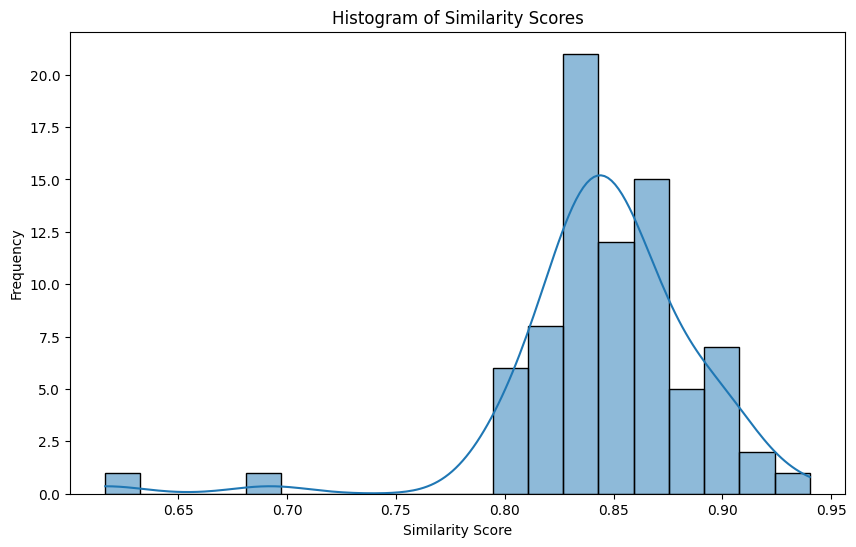

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Similarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(adjusted_similarities, bins=20, kde=True)
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

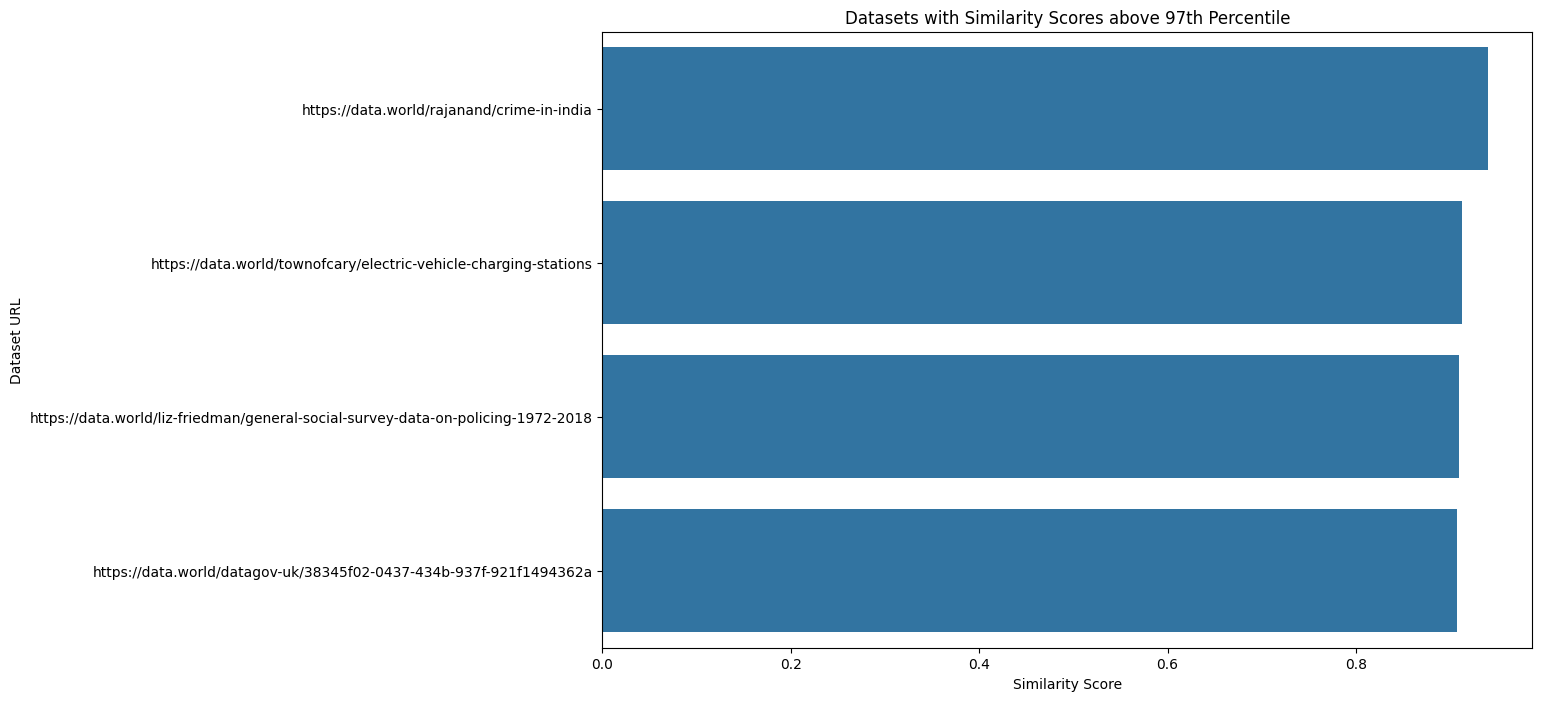

In [22]:
# Filter datasets above the 97th percentile threshold
filtered_dataset_urls_with_scores = [(dataset_url, similarity_score) for dataset_url, similarity_score in sorted_dataset_urls_with_scores if similarity_score >= percentile_threshold]

# Extract dataset URLs and similarity scores
filtered_dataset_urls = [dataset_url for dataset_url, _ in filtered_dataset_urls_with_scores]
filtered_similarity_scores = [similarity_score for _, similarity_score in filtered_dataset_urls_with_scores]

# Bar Chart of Datasets above 97th Percentile
plt.figure(figsize=(12, 8))
sns.barplot(x=filtered_similarity_scores, y=filtered_dataset_urls)
plt.title('Datasets with Similarity Scores above 97th Percentile')
plt.xlabel('Similarity Score')
plt.ylabel('Dataset URL')
plt.show()


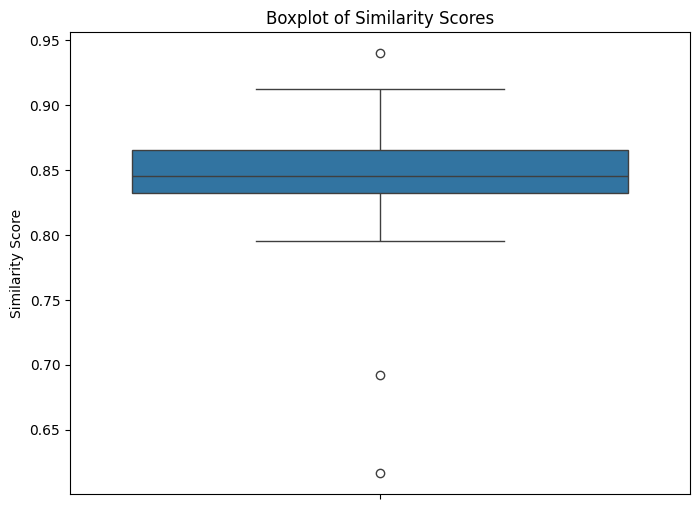

In [23]:
# Boxplot of Similarity Scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=adjusted_similarities)
plt.title('Boxplot of Similarity Scores')
plt.ylabel('Similarity Score')
plt.show()

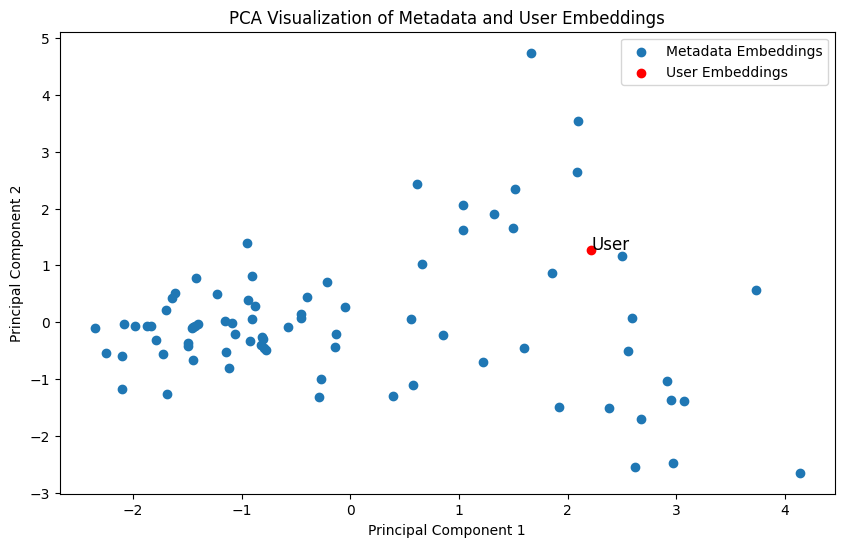

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on metadata embeddings
pca = PCA(n_components=total_output)
metadata_embeddings_pca = pca.fit_transform(metadata_embeddings)

# Perform PCA on user embeddings
user_embeddings_pca = pca.transform(user_embeddings.reshape(1, -1))

# Plot metadata embeddings
plt.figure(figsize=(10, 6))
plt.scatter(metadata_embeddings_pca[:, 0], metadata_embeddings_pca[:, 1], label='Metadata Embeddings')

# Plot user embeddings
plt.scatter(user_embeddings_pca[:, 0], user_embeddings_pca[:, 1], color='red', label='User Embeddings')

# Annotate user embeddings
plt.text(user_embeddings_pca[:, 0], user_embeddings_pca[:, 1], 'User', fontsize=12)

plt.title('PCA Visualization of Metadata and User Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [25]:

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-cased')

In [26]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


metadata = Preprocess_Metadata.copy()

def preprocess_text(text):
    if text == 'nan':
        return ""
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalpha() and len(token) > 1]
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ""

for column in ['title', 'description', 'summary']:
    metadata[column] = metadata[column].apply(preprocess_text)

metadata_embeddings = []
for index, row in metadata.iterrows():
    text = row['title'] + ' ' + row['description'] + ' ' + row['summary']
    tokenized_text = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        output = model(**tokenized_text)
    embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()
    metadata_embeddings.append(embeddings)

user_input = input("Enter your query: ")
tokenized_input = tokenizer(user_input, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    output = model(**tokenized_input)
user_embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()

similarities = cosine_similarity([user_embeddings], metadata_embeddings)[0]

def adjust_score(score, title, description, summary):
    completeness_factor = 0
    if title:
        completeness_factor += 0.1
    if description:
        completeness_factor += 0.1
    if summary:
        completeness_factor += 0.1
    return score + completeness_factor

adjusted_similarities = []
for i, score in enumerate(similarities):
    title, description, summary = metadata.iloc[i]['title'], metadata.iloc[i]['description'], metadata.iloc[i]['summary']
    adjusted_score = adjust_score(score, title, description, summary)
    adjusted_similarities.append(adjusted_score)

# Calculate the 95th percentile threshold
percentile_threshold = np.percentile(adjusted_similarities, 95)

dataset_urls_with_scores = zip(metadata['dataset_url'], adjusted_similarities)
sorted_dataset_urls_with_scores = sorted(dataset_urls_with_scores, key=lambda x: x[1], reverse=True)

print("Relevant dataset URLs sorted by similarity score (descending order):")
for counter, (dataset_url, similarity_score) in enumerate(sorted_dataset_urls_with_scores, start=1):
    if similarity_score >= percentile_threshold:
        print(f"Counter: {counter}")
        print(f"Similarity Score: {similarity_score}")
        print(f"Dataset URL: {dataset_url}")
        metadata_index = metadata.index[metadata['dataset_url'] == dataset_url].tolist()[0]
        print(f"Title: {metadata['title'].iloc[metadata_index]}")
        print(f"Description: {metadata['description'].iloc[metadata_index]}")
        print(f"Summary: {metadata['summary'].iloc[metadata_index]}")
        print("\n")
        total_output = counter


Relevant dataset URLs sorted by similarity score (descending order):
Counter: 1
Similarity Score: 1.021352517604828
Dataset URL: https://data.world/jeffgswanson/electric-vehicle-by-year
Title: electric vehicle year
Description: manufacturer model mile per charge etc year department energy
Summary: fashion product image dataset


Counter: 2
Similarity Score: 1.0169733047485352
Dataset URL: https://data.world/townofcary/electric-vehicle-charging-stations
Title: electric vehicle charging station
Description: electric vehicle charging station
Summary: statewise data classified according csv file


Counter: 3
Similarity Score: 1.00401132106781
Dataset URL: https://data.world/smartcolumbusos/650b7e59-afd3-4c40-9bfc-8d614610b77b
Title: connected electric autonomous vehicle
Description: connected electric autonomous vehicle
Summary: romanian new car registration previous year


Counter: 4
Similarity Score: 0.9872538328170777
Dataset URL: https://data.world/data-ny-gov/thd2-fu8y
Title: nyserda 

In [27]:
relevance_judgments = {url: 1 if score >= percentile_threshold else 0 for url, score in sorted_dataset_urls_with_scores}

# Compute Precision at k (P@k) for the top N documents
k = total_output  # Number of retrieved documents
relevant_count = 0
precision_at_k = []
for i in range(1, k + 1):
    if relevance_judgments[sorted_dataset_urls_with_scores[i - 1][0]] == 1:
        relevant_count += 1
    precision_at_k.append(relevant_count / i)

# Compute Mean Average Precision (MAP)
map_score = np.mean(precision_at_k)

print("Mean Average Precision (MAP):", map_score)


Mean Average Precision (MAP): 1.0


Mean Average Precision (MAP): 1.0


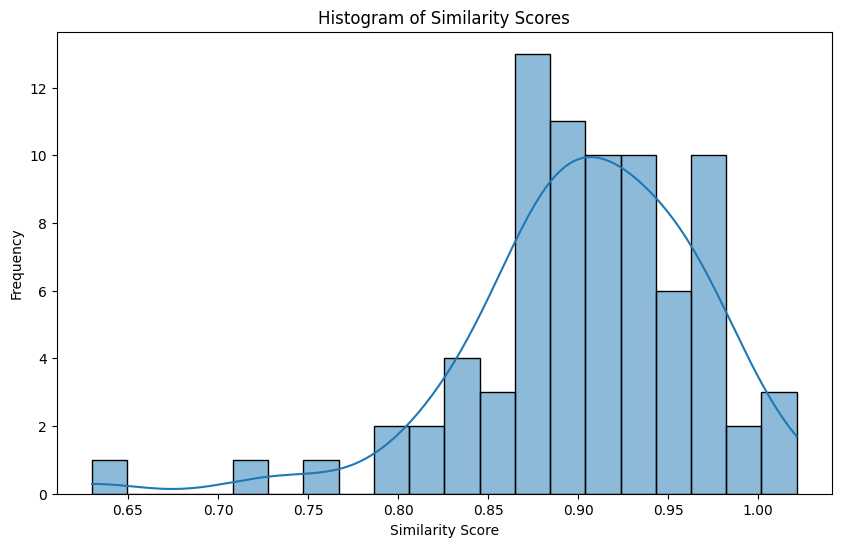

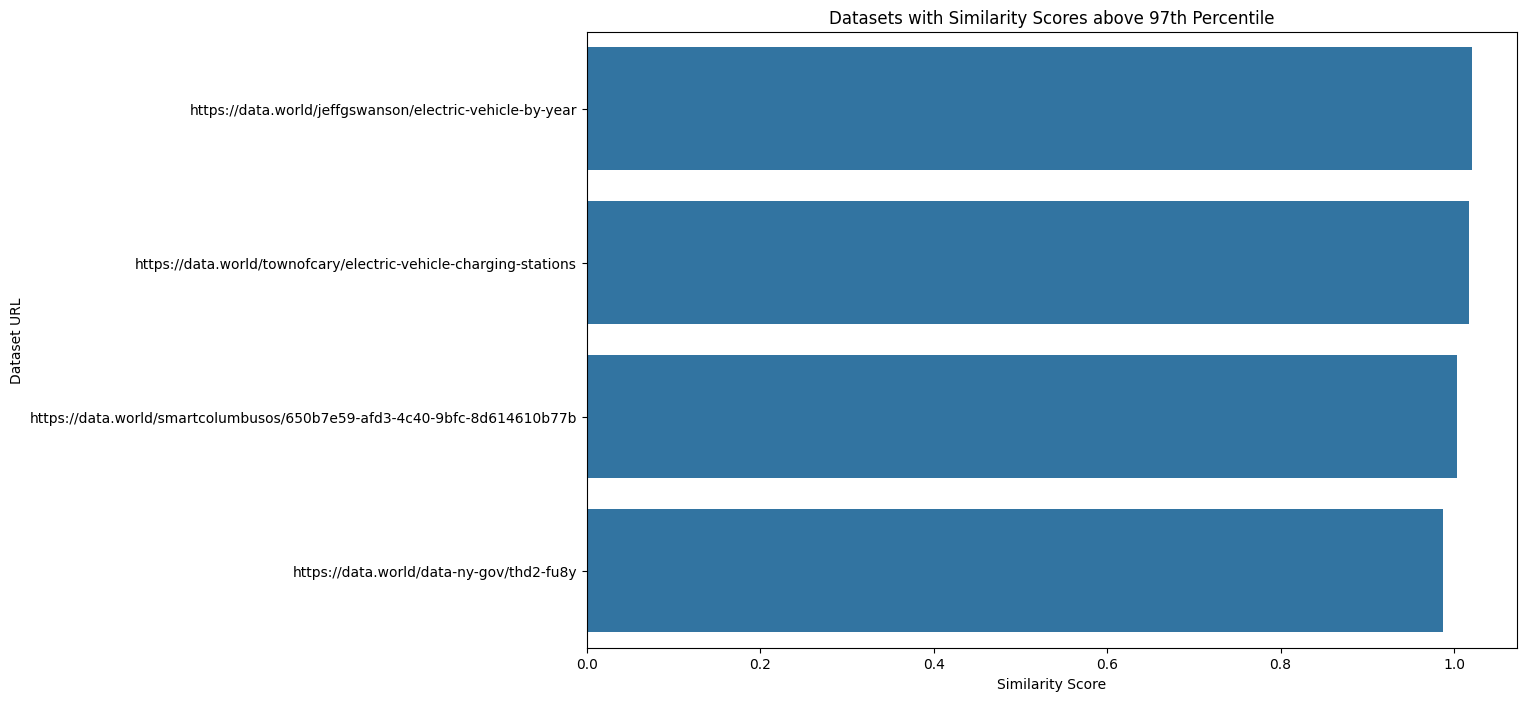

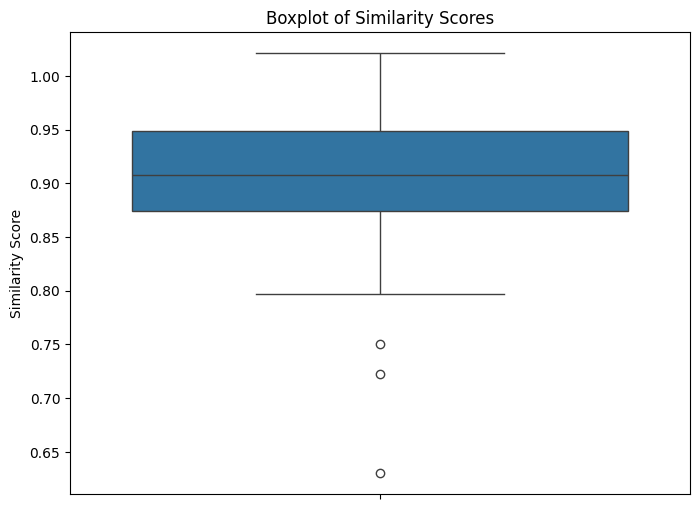

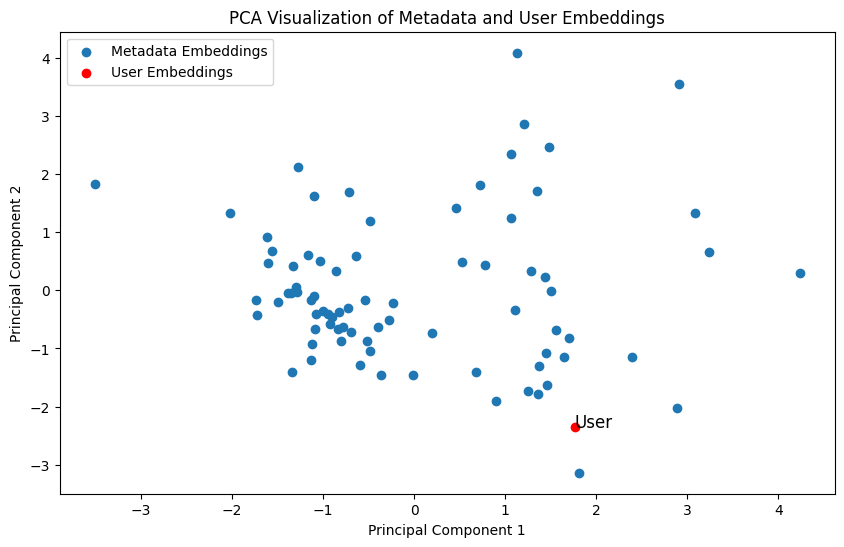

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns


relevance_judgments = {url: 1 if score >= percentile_threshold else 0 for url, score in sorted_dataset_urls_with_scores}

# Compute Precision at k (P@k) for the top N documents
k = total_output  # Number of retrieved documents
relevant_count = 0
precision_at_k = []
for i in range(1, k + 1):
    if relevance_judgments[sorted_dataset_urls_with_scores[i - 1][0]] == 1:
        relevant_count += 1
    precision_at_k.append(relevant_count / i)

# Compute Mean Average Precision (MAP)
map_score = np.mean(precision_at_k)

print("Mean Average Precision (MAP):", map_score)


import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Similarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(adjusted_similarities, bins=20, kde=True)
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Filter datasets above the 97th percentile threshold
filtered_dataset_urls_with_scores = [(dataset_url, similarity_score) for dataset_url, similarity_score in sorted_dataset_urls_with_scores if similarity_score >= percentile_threshold]

# Extract dataset URLs and similarity scores
filtered_dataset_urls = [dataset_url for dataset_url, _ in filtered_dataset_urls_with_scores]
filtered_similarity_scores = [similarity_score for _, similarity_score in filtered_dataset_urls_with_scores]

# Bar Chart of Datasets above 97th Percentile
plt.figure(figsize=(12, 8))
sns.barplot(x=filtered_similarity_scores, y=filtered_dataset_urls)
plt.title('Datasets with Similarity Scores above 97th Percentile')
plt.xlabel('Similarity Score')
plt.ylabel('Dataset URL')
plt.show()

# Boxplot of Similarity Scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=adjusted_similarities)
plt.title('Boxplot of Similarity Scores')
plt.ylabel('Similarity Score')
plt.show()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on metadata embeddings
pca = PCA(n_components=total_output)
metadata_embeddings_pca = pca.fit_transform(metadata_embeddings)

# Perform PCA on user embeddings
user_embeddings_pca = pca.transform(user_embeddings.reshape(1, -1))

# Plot metadata embeddings
plt.figure(figsize=(10, 6))
plt.scatter(metadata_embeddings_pca[:, 0], metadata_embeddings_pca[:, 1], label='Metadata Embeddings')

# Plot user embeddings
plt.scatter(user_embeddings_pca[:, 0], user_embeddings_pca[:, 1], color='red', label='User Embeddings')

# Annotate user embeddings
plt.text(user_embeddings_pca[:, 0], user_embeddings_pca[:, 1], 'User', fontsize=12)

plt.title('PCA Visualization of Metadata and User Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

